In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from shapely.geometry import Polygon
%matplotlib inline

In [66]:
powerplants = pd.read_csv('powerplants.csv')

In [67]:
continental_us_bounds = Polygon([
    [
      -126.474609375,
      24.046463999666567
    ],
    [
      -64.775390625,
      24.046463999666567
    ],
    [
      -64.775390625,
      50.45750402042058
    ],
    [
      -126.474609375,
      50.45750402042058
    ],
    [
      -126.474609375,
      24.046463999666567
    ]
])

In [55]:
points = powerplants.apply(lambda x: Point(x.Longitude, x.Latitude), axis=1)
powerplants = gpd.GeoDataFrame(powerplants, geometry=points)
powerplants.crs = {'init': 'epsg:4326'}
powerplants = powerplants[powerplants.within(continental_us_bounds)].to_crs(epsg=5070)

In [56]:
states = gpd.read_file('cb_2016_us_state_500k/cb_2016_us_state_500k.shp')
states = states[states.within(continental_us_bounds)].to_crs(epsg=5070)

# 1. Make a map of power plants in the US, color coded by type


---> I take only the 500 first rows otherwise it's too slow

(-2586829.4388886895,
 2488915.8729062313,
 124423.84046021817,
 3317717.6387093915)

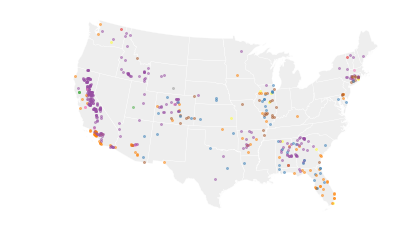

In [57]:
ax = states.plot(
    color='#dedede',
    edgecolor='white',
    linewidth=0.25
)
powerplants[:500].plot(column='PrimSource', alpha=0.45, ax=ax)
ax.axis('off')

# 2. Make a map of air quality stations, color coded by average air quality

In [58]:
quality_stations = pd.read_csv('pm25_annual_fixed.csv')
quality_stations.dtypes

State Code                         int64
County Code                        int64
Site Num                           int64
Parameter Code                     int64
POC                                int64
Latitude                         float64
Longitude                        float64
Datum                             object
Parameter Name                    object
Sample Duration                   object
Pollutant Standard                object
Metric Used                       object
Method Name                       object
Year                               int64
Units of Measure                  object
Event Type                        object
Observation Count                  int64
Observation Percent                int64
Completeness Indicator            object
Valid Day Count                    int64
Required Day Count                 int64
Exceptional Data Count             int64
Null Data Count                    int64
Primary Exceedance Count         float64
Secondary Exceed

In [59]:
points = quality_stations.apply(lambda x: Point(x.Longitude, x.Latitude), axis=1)
quality_stations = gpd.GeoDataFrame(quality_stations, geometry=points)
quality_stations.crs = {'init': 'epsg:4326'}
quality_stations = quality_stations[quality_stations.within(continental_us_bounds)].to_crs(epsg=5070)

(-2586829.4388886895,
 2488915.8729062313,
 124423.84046021817,
 3317717.6387093915)

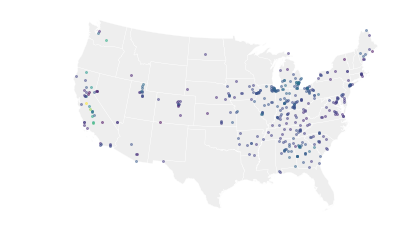

In [60]:
ax = states.plot(
    color='#dedede',
    edgecolor='white',
    linewidth=0.25
)
quality_stations[:400].plot(column='Arithmetic Mean', alpha=0.45, ax=ax)
ax.axis('off')

# 3. Make a map of air quality stations, color coded by worst air quality ever 

(-2586829.4388886895,
 2488915.8729062313,
 124423.84046021817,
 3317717.6387093915)

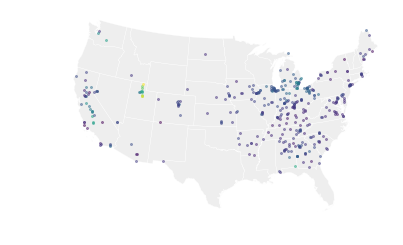

In [61]:
ax = states.plot(
    color='#dedede',
    edgecolor='white',
    linewidth=0.25
)
quality_stations[:400].to_crs(epsg=5070).plot(column='1st Max Value', alpha=0.45, ax=ax)
ax.axis('off')

# 4. Map the power plants owned by the top 5 most common energy companies as red. Map the rest of the plants as dark grey.


In [62]:
big_companies = powerplants['Utility_Na'].value_counts().nlargest(5).index

(-2586829.4388886895,
 2488915.8729062313,
 124423.84046021817,
 3317717.6387093915)

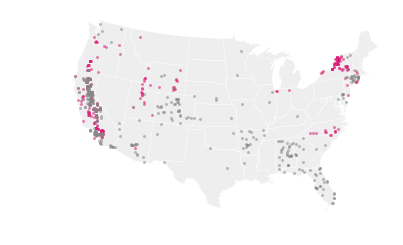

In [63]:
ax = states.plot(
    color='#dedede',
    edgecolor='white',
    linewidth=0.25
)
powerplants[powerplants['Utility_Na'].isin(big_companies)].to_crs(epsg=5070).plot(color='#dd1c77', alpha=0.45, ax=ax)
powerplants[:400].to_crs(epsg=5070).plot(color='#888888', alpha=0.45, ax=ax)
ax.axis('off')

# 5. Map all of the nuclear power plants in red, with the rest of the plants as dark grey.

(-2586829.4388886895,
 2488915.8729062313,
 124423.84046021817,
 3317717.6387093915)

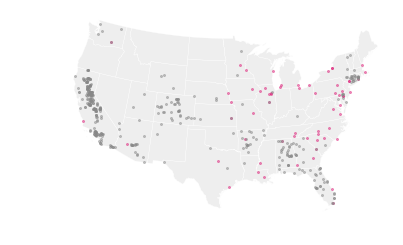

In [64]:
ax = states.plot(
    color='#dedede',
    edgecolor='white',
    linewidth=0.25
)
powerplants[powerplants['PrimSource'] == 'nuclear'].to_crs(epsg=5070).plot(color='#dd1c77', alpha=0.45, ax=ax)
powerplants[:400].to_crs(epsg=5070).plot(color='#888888', alpha=0.45, ax=ax)
ax.axis('off')

# 6. Map power plants that produce energy through both natural gas and oil.

(-2586829.4388886895,
 2488915.8729062313,
 124423.84046021817,
 3317717.6387093915)

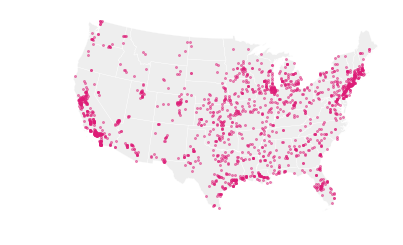

In [65]:
ax = states.plot(
    color='#dedede',
    edgecolor='white',
    linewidth=0.25
)
powerplants[(powerplants['PrimSource'] == 'natural gas') | (powerplants['PrimSource'] == 'oil')].to_crs(epsg=5070).plot(color='#dd1c77', alpha=0.45, ax=ax)
ax.axis('off')